Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
         Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ..

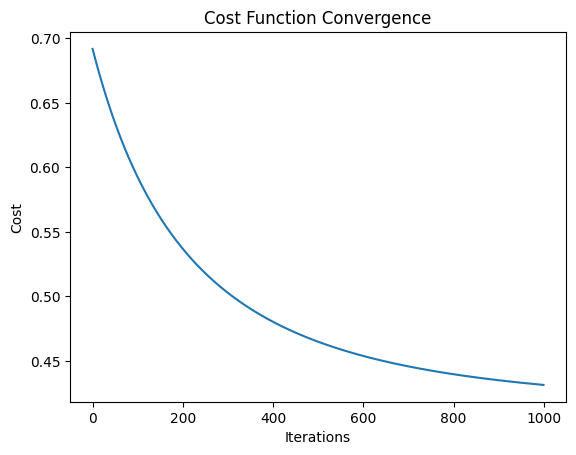

In [8]:
# Step 1: Import required libraries
import numpy as np
import pandas as pd

# Step 2: Load the dataset
# Mount Google Drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/weatherAUS.csv'

# Load the dataset
data = pd.read_csv(file_path)


# Display the first few rows of the dataset
print(data.head())

# Step 3: Preprocess the data
# Using selected columns as features and 'RainTomorrow' as the target variable
# We'll use 'MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', and 'Humidity3pm' as features.


X = data[['MinTemp', 'MaxTemp', 'Rainfall', 'Humidity9am', 'Humidity3pm']]
y = data['RainTomorrow']  # Target variable

# Handle missing values by filling them with the mean (or use a different approach if needed)
X = X.fillna(X.mean())
y = y.fillna(0)  # Assuming NaN in 'RainTomorrow' means no rain

# Convert 'RainTomorrow' to binary (1 for 'Yes', 0 for 'No')
y = y.apply(lambda x: 1 if x == 'Yes' else 0)

# Normalize features for better convergence
X = (X - X.mean()) / X.std()

# Add intercept (bias) term (a column of ones)
X = np.c_[np.ones(X.shape[0]), X]

# Step 4: Initialize parameters
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1 / m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        # Update theta using the gradient
        gradient = (1 / m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= learning_rate * gradient

        # Store cost for plotting
        cost_history.append(cost_function(X, y, theta))

    return theta, cost_history

# Initialize parameters
theta = np.zeros(X.shape[1])  # Initialize theta (weights)
learning_rate = 0.01
iterations = 1000

# Convert y to numpy array
y = y.values

# Step 5: Train the model
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Step 6: Make predictions
def predict(X, theta):
    probabilities = sigmoid(X @ theta)
    return [1 if prob >= 0.5 else 0 for prob in probabilities]

y_pred = predict(X, theta)

# Step 7: Calculate accuracy
accuracy = np.mean(y_pred == y) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Step 8: Visualize cost history (optional)
import matplotlib.pyplot as plt

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.show()
